In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib.colors import ListedColormap

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Number of examples.
N = 1000
centers = [[-0.5, 0], [0, 1.5]]
x, y = make_blobs(n_samples=N, centers=centers, random_state=42)

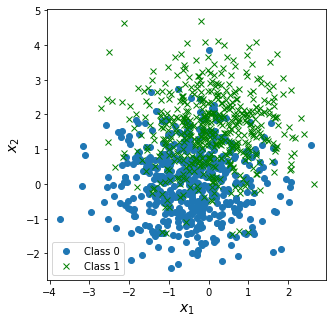

In [3]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], 'o', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'gx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.savefig('knn_for_two_classes.png', dpi=600)
plt.show()

# Parte 1: Perceptron

In [4]:
per = Perceptron(random_state=42)
per.fit(x, y)

y_pred = per.predict(x)

accuracy = accuracy_score(y, y_pred)
print('accuracy: ',accuracy)

accuracy:  0.762


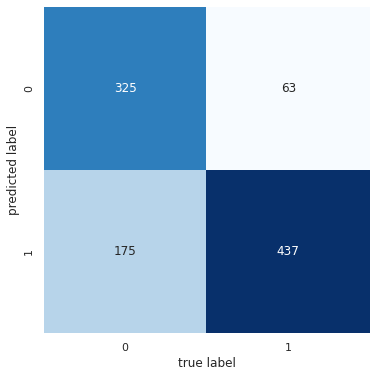

In [5]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(6,6))
mat = confusion_matrix(y, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_dt.png', dpi=600)
plt.show()

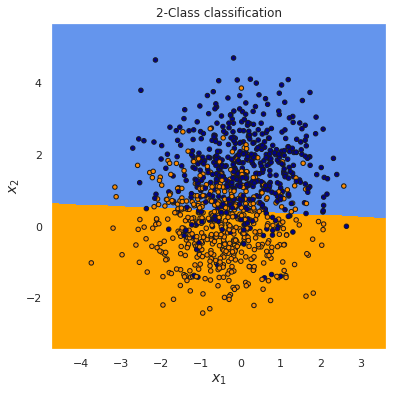

In [6]:
# Step size in the mesh.
h = 0.02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(6, 6))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = per.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

plt.savefig('decision_boundary_dt.png', dpi=600)
plt.show()

# Parte 2: Regressao Logistica

In [7]:
per_rl = LogisticRegression(solver='lbfgs', random_state=42)
per_rl.fit(x, y)

y_pred_rl = per_rl.predict(x)

accuracy = accuracy_score(y, y_pred_rl)
print('accuracy: ',accuracy)

accuracy:  0.797


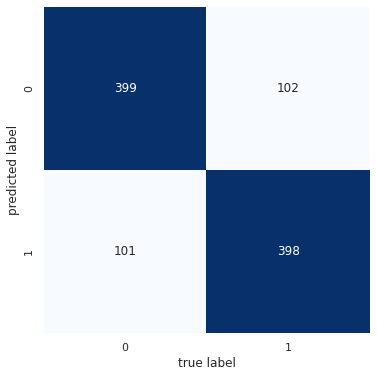

In [8]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(6,6))
mat = confusion_matrix(y, y_pred_rl)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_dt.png', dpi=600)
plt.show()

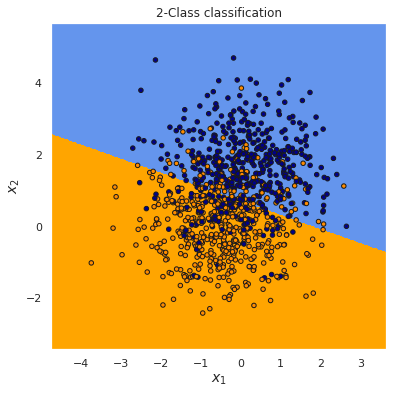

In [9]:
# Step size in the mesh.
h = 0.02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(6, 6))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = per_rl.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

plt.savefig('decision_boundary_dt.png', dpi=600)
plt.show()

# Resposta Letra F)

In [ ]:
'''

Avaliando o parametro de precisão do modelo, podemos ver que a solução baseada em
regressao logistica tem um pouco mais de capacidade doque a solução com perceptron.
Embora a diferença seja pequena, em termos de performance, podemos atribuir essa ligeira 
melhora no fato de a regressao realacionar as probabilidades das classes para escolher a 
decisao binaria, levando a uma melhor precisao, enquanto que o perceptron realiza
realiza uma escolha diretamente binaria para a solução.
 


'''